# Exploratory Analysis of Indian Restaurants

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [3]:
df = pd.read_csv('../input/zomato-bangalore-restaurants/zomato.csv')


## Step 1 - Data Understanding
- Dataframe shape
- Head/tail
- columns/dtypes
- describe

In [4]:
df.shape

(51717, 17)

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


Only one numeric column... I may have to do some transformations

## Step 2: Data Preparation
- Drop columns and rows
- Remove duplicate rows
- Rename columns
- Grouping values
- Feature engineer

Columns that are not interesting or may not be grouped (e.g phone number)

In [7]:
df = df.drop(["url", "address", "phone", "menu_item", "dish_liked", "reviews_list"], axis = 1)
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


From 17 to 11 columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


Renaming it to readability issues

In [9]:
df = df.rename(columns = {"approx_cost(for two people)":"approx_cost_two_people",
                     "listed_in(type)": "type", 
                     "listed_in(city)": "city"})
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost_two_people', 'type', 'city'],
      dtype='object')

In [10]:
df = df.drop_duplicates()


Now, let's examine each feature and clean them

In [11]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

I have to remove "/5", "NEW", "-" and additional space from each value

In [12]:
def clean_rate(rate):
    if rate == "NEW" or rate == "-":
        return np.nan
    else:
        rate = str(rate).split("/")
        return float(rate[0])

df["rate"] = df["rate"].apply(clean_rate)
df["rate"].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

OK, let's handle the null values

In [13]:
df["rate"].isnull().sum()

10019

One possible way is to add the mean value, which is 3.7.

In [14]:
df["rate"] = df["rate"].fillna(df["rate"].mean())
df["rate"].value_counts().head(10)

rate
3.700142    10019
3.900000     3967
3.800000     3870
3.700000     3814
3.600000     3311
4.000000     3180
4.100000     2942
3.500000     2781
3.400000     2472
3.300000     2305
Name: count, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    51609 non-null  object 
 1   online_order            51609 non-null  object 
 2   book_table              51609 non-null  object 
 3   rate                    51609 non-null  float64
 4   votes                   51609 non-null  int64  
 5   location                51588 non-null  object 
 6   rest_type               51382 non-null  object 
 7   cuisines                51564 non-null  object 
 8   approx_cost_two_people  51265 non-null  object 
 9   type                    51609 non-null  object 
 10  city                    51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


Let's drop all lines that has at least one null value. From 51716 to 51041 items

In [16]:
df = df.dropna().reset_index(drop=True).copy()

Our dataset, so far

In [17]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost_two_people,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


"Location" and "city" seems repeated. Let's remove the city.

In [18]:
df = df.drop(["city"], axis = 1)

The "Cost of two people" is a string and also has commas. Let's fix it.

In [19]:
df["approx_cost_two_people"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [20]:
def clean_two_people_cost(cost):
    if "," in cost:
        cost = cost.replace(",", "")
    return float(cost)

df["approx_cost_two_people"] = df["approx_cost_two_people"].apply(clean_two_people_cost)
df["approx_cost_two_people"].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

Too many possible values for "rest_types". I'm going to group them.

In [21]:
rest_types = df["rest_type"].value_counts()
rest_types

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [22]:
#df["rest_type"] < 1000
rest_types_less_1000 = rest_types[rest_types < 1000]
rest_types_less_1000

rest_type
Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: count, Length: 85, dtype: int64

In [23]:
def group_rest_type(rest_type):
    if rest_type in rest_types_less_1000:
        return "Others"
    else:
        return rest_type
    
df["rest_type"] = df["rest_type"].apply(group_rest_type)
df["rest_type"].value_counts()

rest_type
Quick Bites           19010
Casual Dining         10253
Others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: count, dtype: int64

Group "location"

In [24]:
location = df["location"].value_counts()
location_less_300 = location[location<300]

def group_location(value):
    if value in location_less_300:
        return "Others"
    else:
        return value
    
df["location"] = df["location"].apply(group_location)
df["location"].value_counts().head(10)

location
BTM                      5056
Others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Name: count, dtype: int64

Cleaning "cuisines"

In [25]:
cuisines = df["cuisines"].value_counts()
cuisines_less_100 = cuisines[cuisines<100]

def group_cuisines(value):
    if value in cuisines_less_100:
        return "Others"
    else:
        return value
    
df["cuisines"] = df["cuisines"].apply(group_cuisines)
df["cuisines"].value_counts().head(10)

cuisines
Others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
Bakery, Desserts                         898
Fast Food                                796
Desserts                                 754
Cafe                                     725
South Indian, North Indian, Chinese      724
Name: count, dtype: int64

## Step 3 - Feature Understanding
- Plotting data (univariable)

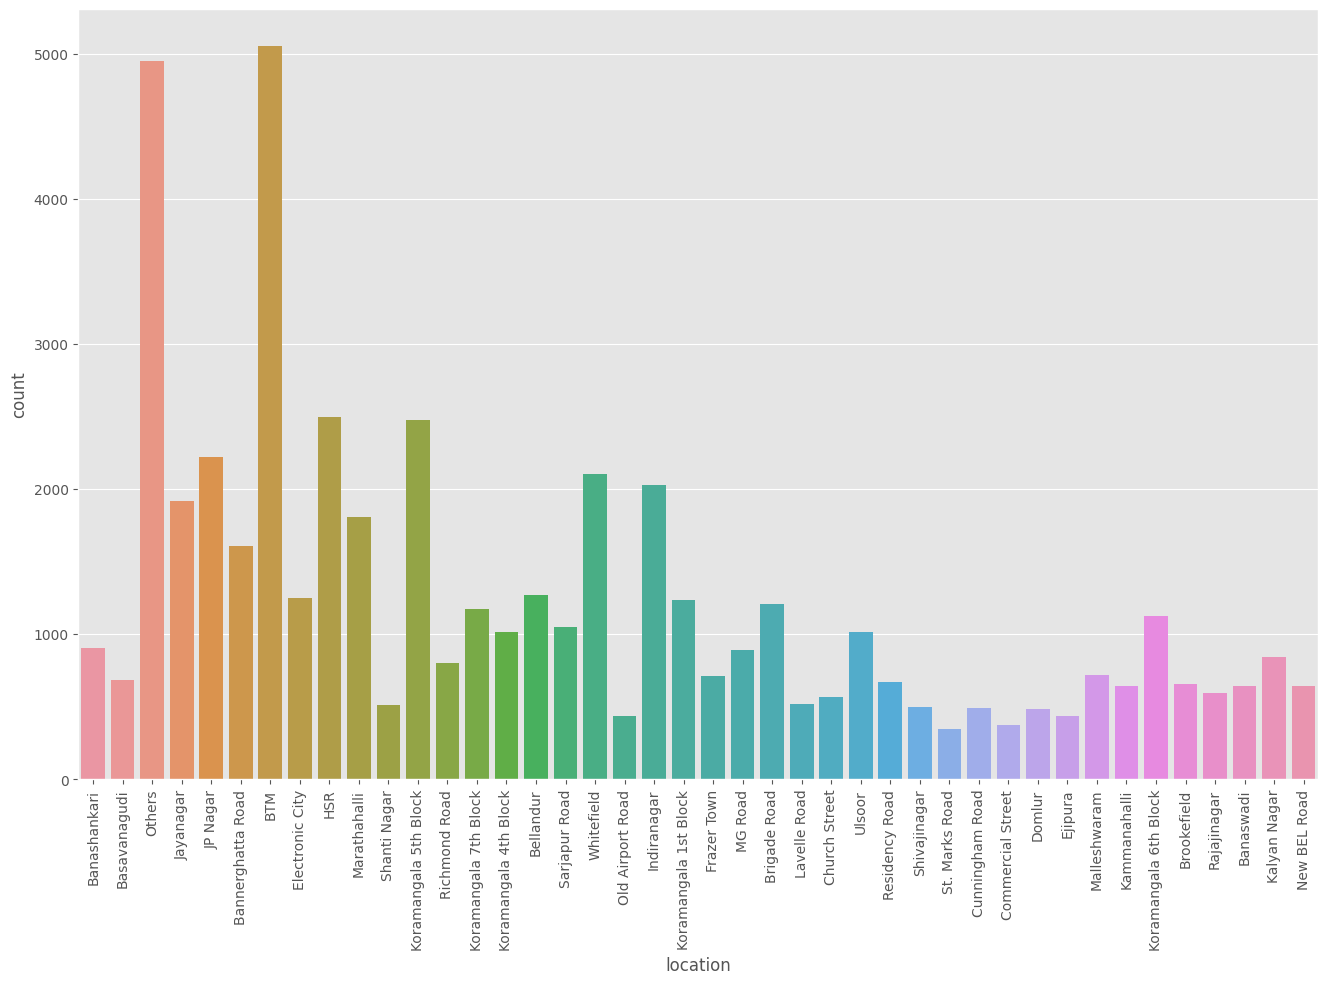

In [38]:
plt.figure(figsize =  (16,10))
ax = sns.countplot(x = df["location"], data = df)

plt.xticks(rotation=90);

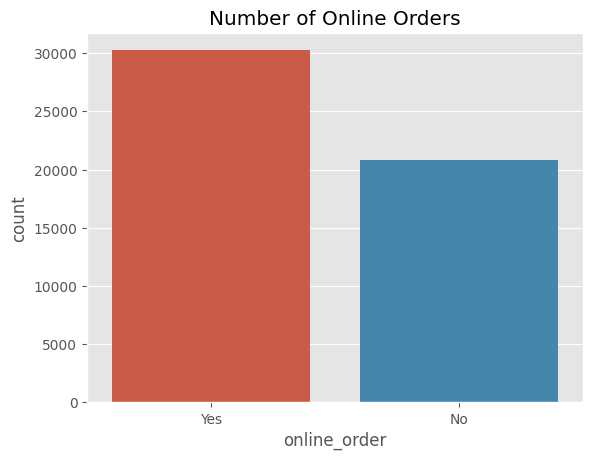

In [27]:
ax = sns.countplot(x = df["online_order"], data = df).set_title("Number of Online Orders")

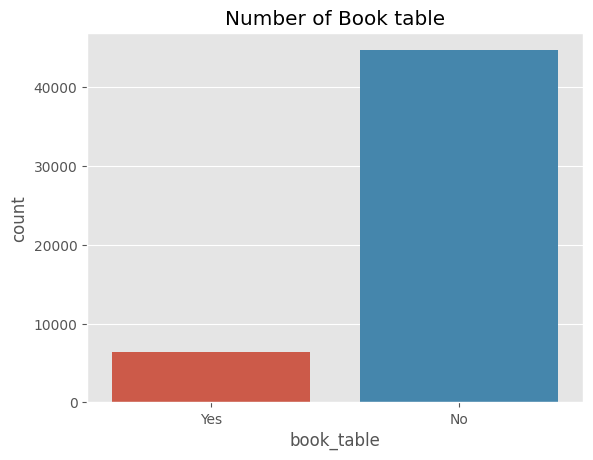

In [28]:
ax = sns.countplot(x = df["book_table"], data = df).set_title("Number of Book table")

## Step 4: Feature Relationships

Here, we can see that the rate of restaurants that have the possibility of ordering online is higher than the ones that do not have this possibility

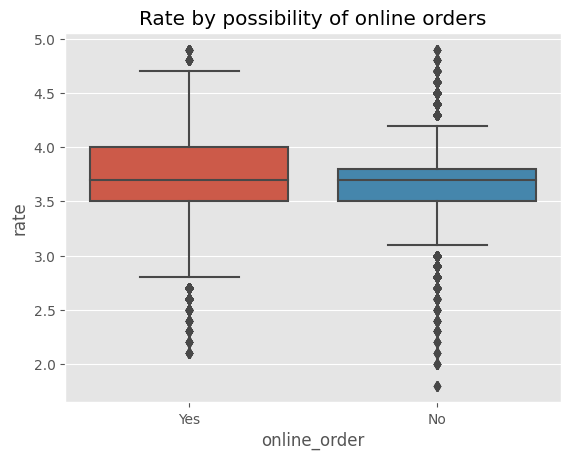

In [43]:
sns.boxplot(x = 'online_order', y = "rate", data = df).set_title("Rate by possibility of online orders");

The same with the possibility of booking table has a higher rate (and median) for restaurants that do not have this possibility

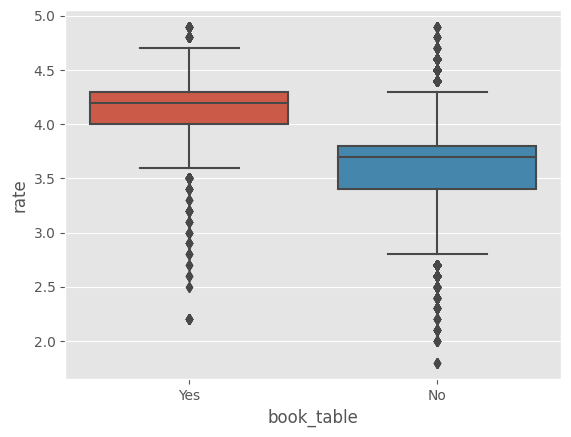

In [40]:
sns.boxplot(x = 'book_table', y = "rate", data = df).set_title("Rate by possibility of book table");

It seems that the best rated restaurants are buffet, drinks, pubs and bars.

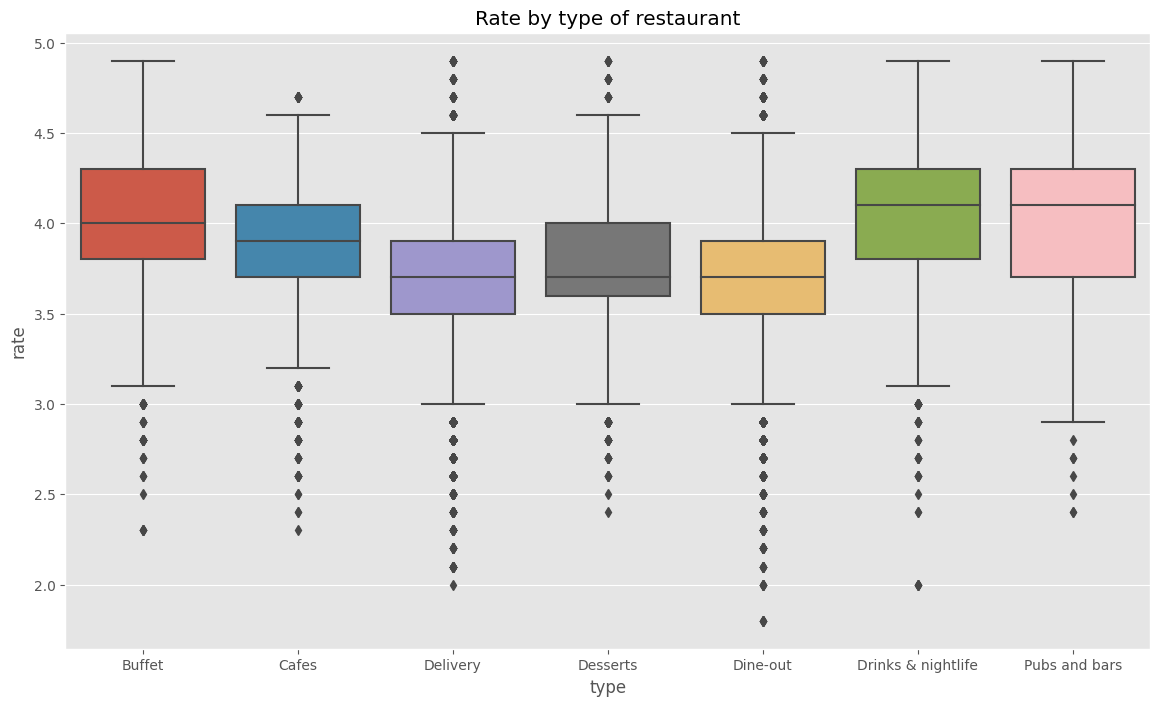

In [44]:
plt.figure(figsize = (14,8))
sns.boxplot(x = 'type', y = 'rate', data = df).set_title("Rate by type of restaurant");